Lorenzon 	
CS 1.3 	
CS 2.4 	
CS 4.3 	
BC 2.5 	
DAAG 7.5 

# CS 1.3 	

Suppose that 
$$ Y \sim 
\left(
\begin{bmatrix}
    1  \\
   2 
\end{bmatrix},
\begin{bmatrix}
2 & 1 \\
1 & 2  
\end{bmatrix}
\right) $$

Find the conditional p.d.f. of $Y_1$ given that $Y_1 + Y_2 = 3$

**Solution:**


The conditional (on $Y_2 = 3 - Y_1$ )   distribution is a multivariate normal $(Y_1 | Y_2 = 3 - Y_1) \sim N(\bar\mu , \bar\Sigma)$ where:

$\bar\mu = \mu_1 + \Sigma_{12} \Sigma_{22}^{-1}(3 -Y_1 - \mu_2)$

and covariance matrix:

$ \bar\Sigma = \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$

As a general case, $$X_1 | X_2 = x_2 \sim Normal \left(\mu_1 + \frac{\sigma_1}{\sigma_2} \rho (x_2-\mu_2), (1-\rho^2)\sigma_1^2\right)$$

with $\rho = -1$

so

$$X_1 | X_2 = x_2 \sim Normal \left(\mu_1 - \frac{\sigma_1}{\sigma_2}  (x_2-\mu_2), (1-1)\sigma_1^2\right)$$

$$X_1 | X_2 = x_2 \sim Normal \left(\mu_1 - \frac{\sigma_1}{\sigma_2}  (x_2-\mu_2), 0\right)$$

From $\Sigma$, $\sigma_1 = \sigma_2$, so it reduces to:

$$X_1 | X_2 = x_2 \sim Normal \left(\mu_1 - (x_2-\mu_2), 0\right)$$

$$X_1 | X_2 = x_2 \sim Normal \left(\mu_1+\mu_2 - x_2, 0\right)$$

and from the problem

$$X_1 | X_2 = x_2 \sim Normal \left(3-x_2, 0\right)$$

It makes sense, since, if you know one of the variables, and the sum is fixed, you know the other.

# CS 2.4

Using R, write a function to evaluate the log-likelihood of $\theta_t$ for example 4 in section 2.1. (Hint: see `?dexp`). Plot log likelihood against $\theta_t$ over a suitable range and making use of (2.4) and the definition of a confidence interval, find a 95% confidence interval for $\theta_t$ (`pchisq` is also useful).

MLE for exponential distributions is $\hat\lambda=\frac{1}{\bar x}$

In [178]:


#range of theta
theta <- seq (0.00000001, 0.01, 0.00001)

#data from book
xx = c (28, 32, 49, 84, 357,933,1078,1183,1560,2114,2144)

cat("mean: " , mean(xx), "\n") 
cat("MLE : " , 1/mean(xx)) #MLE

n= length(xx)

#log likelihod
LLexp <- function (theta) {
     log(theta) * n -theta*sum(xx)
}

#likelihood, to compare peaks
Lexp <- function (theta) {
    theta^n * exp(-theta*sum(xx))
}


mean:  869.2727 
MLE :  0.001150387

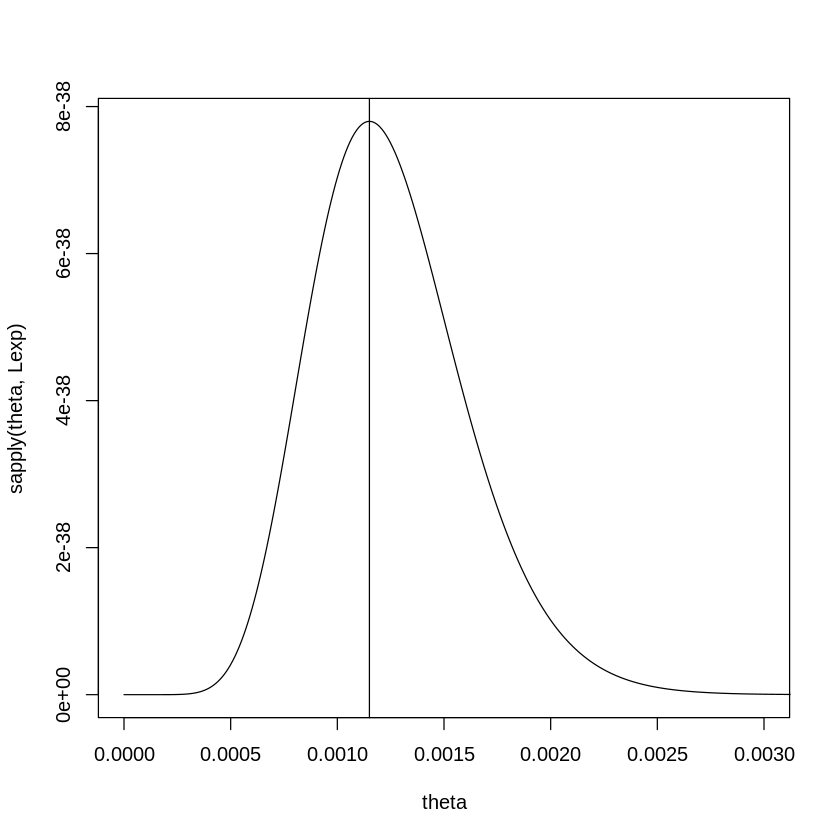

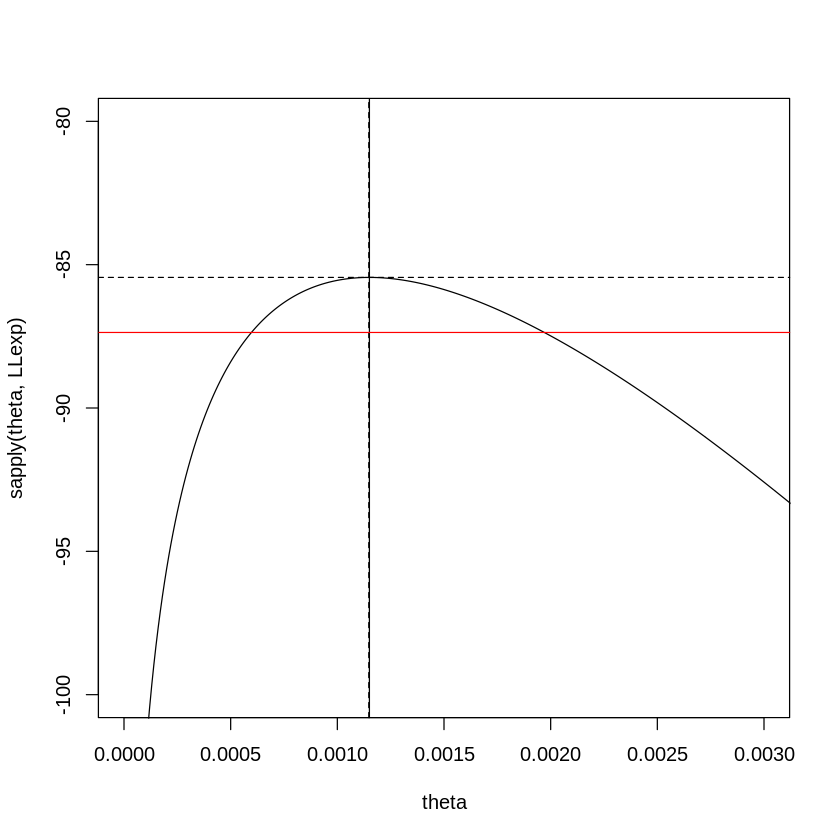

In [179]:
options(warn=-1) #to temporarily suppress warnings about Nelder-Mead optimization

#likelihood (extra work, just for reference)
plot(theta,sapply(theta, Lexp), type="l", xlim=c(0,0.003))
abline(v=1/mean(xx))  #MLE

#loglikelihood with CI
negLLexp <- function (t) { - LLexp(t)} #negative log lik target function
opt <- optim(1,negLLexp)
#despite the warnings, the results are reliable

plot(theta,sapply(theta, LLexp), type="l", xlim=c(0,0.003), ylim=c(-100,-80))
abline(v=1/mean(xx))  #MLE
abline(v=opt$par, lty=2) #perfect superposition with MLE
abline(h=-opt$value, lty=2) #max L
abline(h=-opt$value-qchisq(.95,1)/2, lty=1, col="red")  #95% CI for ML


In [188]:
#finire il confidence i

[1] -1.920729

# CS 4.3


Random variables $X$ and $Y$ have a joint p.d.f. $f(x,y)= k x^\alpha y^\beta , 0 \le x\le 1, 0 \le y\le 1$.

Assume that you have $n$ independent pairs of observations $(x_i, y_i)$:

a) evaluate $k$ in terms of $\alpha$ and $\beta$.

b) find the ML estimators of $\alpha$ and $\beta$

c) find the appropriate variances of $\hat\alpha$ and $\hat\beta$

# BC 2.5

**Estimate a normal mean with discrete prior.**

Suppose you are interested in estimating the total average snowfall per year $\mu$ (in inches) for a large city on the East Coast of the United States. Assume individual yearly snow totals $y_1, ... , y_n$ are collected from a population that is assumed to be normally distributed with mean $\mu$ and known standard deviation $\sigma$ = 10 inches.

a) before collecting data, suppose you believe that the mean snowfall $\mu$ can be the values 20,30,40,50,60,70 inches with the following probabilities:

    mu    |  20    30    40    50    60    70
    sigma |  .1    .15   .25   .25   .15   .1
    
Place the $\mu$ probabilities in the vector `mu` and the associated prior probabilities in the vector `prior`.


In [2]:
mu <- c(20,30,40,50,60,70)
sigma <- c(.1,.15,.25,.25,.15,.1)

b) Suppose you observe the yearly snowfall totals 38.6, 42.4, 57.5, 40.5, 51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7. Enter these data in the vector `y` and compute the sample mean `ybar`.

In [3]:
y <- c(38.6, 42.4, 57.5, 40.5, 51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7)
ybar <- mean(y)

c) In this problem, the likelihood function is given by  $$ L(\mu) = exp (-\frac{n}{2\sigma}(\mu-\bar y)^2)$$ where $\bar y$ is the sample mean. Compute the likelihood of the list of values in `mu` and place the likelihood values in the vector `like`. 

In [ ]:
function L(x, m, s) {
    y 
}

d) one can compute the posterior probability for $\mu$ using the formula `post=prior*like/sum(prior*like)`. Compute the posterior probabilities of $\mu$ for this example.

e) Using the function `discint`, find an 80% probability interval for $\mu$.

# DAAG 7.5 

The data frame `cuckoos` holds data on the lengths and breadths of eggs of cuckoos, found in
the nests of six different species of host birds. Fit models for the regression of length on breadth
that have:

A: a single line for all six species.
B: different parallel lines for the different host species.
C: separate lines for the separate host species.

Use the `anova()` function to print out the sequential analysis of variance table. Which of the
three models is preferred? Print out the diagnostic plots for this model. Do they show anything
worthy of note? Examine the output coefficients from this model carefully, and decide whether
the results seem grouped by host species. How might the results be summarized for reporting
purposes?
